### **Import Library**

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset, random_split
import torch.optim as optim

import numpy as np
import pandas as pd
import scipy.stats as stats
import math

from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

In [ ]:
trainset = pd.read_csv('UNSW_NB15_training-set.csv')
testset = pd.read_csv('UNSW_NB15_testing-set.csv')

### **Preprocessing The Training and Testing Set**

In [ ]:
trainset.head(10)

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0
5,6,0.380537,tcp,-,FIN,10,6,534,268,39.417980,...,1,40,0,0,0,2,39,0,Normal,0
6,7,0.637109,tcp,-,FIN,10,8,534,354,26.683033,...,1,40,0,0,0,1,39,0,Normal,0
7,8,0.521584,tcp,-,FIN,10,8,534,354,32.593026,...,1,40,0,0,0,3,39,0,Normal,0
8,9,0.542905,tcp,-,FIN,10,8,534,354,31.313031,...,1,40,0,0,0,3,39,0,Normal,0
9,10,0.258687,tcp,-,FIN,10,6,534,268,57.985135,...,1,40,0,0,0,3,39,0,Normal,0


In [ ]:
testset.head(10)

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.09020,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.00030,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.00510,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.66080,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.00250,...,1,3,0,0,0,2,3,0,Normal,0
5,6,0.000003,udp,-,INT,2,0,784,0,333333.32150,...,1,2,0,0,0,2,2,0,Normal,0
6,7,0.000006,udp,-,INT,2,0,1960,0,166666.66080,...,1,2,0,0,0,2,2,0,Normal,0
7,8,0.000028,udp,-,INT,2,0,1384,0,35714.28522,...,1,3,0,0,0,1,3,0,Normal,0
8,9,0.000000,arp,-,INT,1,0,46,0,0.00000,...,2,2,0,0,0,2,2,1,Normal,0
9,10,0.000000,arp,-,INT,1,0,46,0,0.00000,...,2,2,0,0,0,2,2,1,Normal,0


In [ ]:
trainset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175341 entries, 0 to 175340
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 175341 non-null  int64  
 1   dur                175341 non-null  float64
 2   proto              175341 non-null  object 
 3   service            175341 non-null  object 
 4   state              175341 non-null  object 
 5   spkts              175341 non-null  int64  
 6   dpkts              175341 non-null  int64  
 7   sbytes             175341 non-null  int64  
 8   dbytes             175341 non-null  int64  
 9   rate               175341 non-null  float64
 10  sttl               175341 non-null  int64  
 11  dttl               175341 non-null  int64  
 12  sload              175341 non-null  float64
 13  dload              175341 non-null  float64
 14  sloss              175341 non-null  int64  
 15  dloss              175341 non-null  int64  
 16  si

In [ ]:
testset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82332 entries, 0 to 82331
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 82332 non-null  int64  
 1   dur                82332 non-null  float64
 2   proto              82332 non-null  object 
 3   service            82332 non-null  object 
 4   state              82332 non-null  object 
 5   spkts              82332 non-null  int64  
 6   dpkts              82332 non-null  int64  
 7   sbytes             82332 non-null  int64  
 8   dbytes             82332 non-null  int64  
 9   rate               82332 non-null  float64
 10  sttl               82332 non-null  int64  
 11  dttl               82332 non-null  int64  
 12  sload              82332 non-null  float64
 13  dload              82332 non-null  float64
 14  sloss              82332 non-null  int64  
 15  dloss              82332 non-null  int64  
 16  sinpkt             823

### Check Duplicate Data

In [ ]:
print(f'Data duplikat pada train set: {trainset.duplicated().sum()}')
print(f'Data duplikat pada test set: {testset.duplicated().sum()}')

Data duplikat pada train set: 0
Data duplikat pada test set: 0


### Drop Column
Pada proyek ini, akan dilakukan *binary classification* sehingga kolom 'attack_cat' dihapus, termasuk kolom 'id'.

In [ ]:
drop_cols = ['id', 'attack_cat']
trainset.drop(drop_cols, axis=1, inplace=True)
testset.drop(drop_cols, axis=1, inplace=True)

### Descriptive Analysis of Features

In [ ]:
trainset_num = trainset.select_dtypes(include='number')
trainset_num.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
dur,175341.0,1.359389e+00,6.480249e+00,0.0,0.000008,0.001582,6.680690e-01,5.999999e+01
spkts,175341.0,2.029866e+01,1.368876e+02,1.0,2.000000,2.000000,1.200000e+01,9.616000e+03
dpkts,175341.0,1.896959e+01,1.102583e+02,0.0,0.000000,2.000000,1.000000e+01,1.097400e+04
sbytes,175341.0,8.844844e+03,1.747656e+05,28.0,114.000000,430.000000,1.418000e+03,1.296523e+07
dbytes,175341.0,1.492892e+04,1.436542e+05,0.0,0.000000,164.000000,1.102000e+03,1.465555e+07
rate,175341.0,9.540619e+04,1.654010e+05,0.0,32.786140,3225.806520,1.250000e+05,1.000000e+06
sttl,175341.0,1.795470e+02,1.029400e+02,0.0,62.000000,254.000000,2.540000e+02,2.550000e+02
dttl,175341.0,7.960957e+01,1.105069e+02,0.0,0.000000,29.000000,2.520000e+02,2.540000e+02
sload,175341.0,7.345403e+07,1.883574e+08,0.0,13053.338870,879674.750000,8.888889e+07,5.988000e+09
dload,175341.0,6.712056e+05,2.421312e+06,0.0,0.000000,1447.022705,2.784487e+04,2.242273e+07


In [ ]:
testset_num = testset.select_dtypes(include='number')
testset_num.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
dur,82332.0,1.006756e+00,4.710444e+00,0.0,0.000008,1.413800e-02,7.193603e-01,5.999999e+01
spkts,82332.0,1.866647e+01,1.339164e+02,1.0,2.000000,6.000000e+00,1.200000e+01,1.064600e+04
dpkts,82332.0,1.754594e+01,1.155741e+02,0.0,0.000000,2.000000e+00,1.000000e+01,1.101800e+04
sbytes,82332.0,7.993908e+03,1.716423e+05,24.0,114.000000,5.340000e+02,1.280000e+03,1.435577e+07
dbytes,82332.0,1.323379e+04,1.514715e+05,0.0,0.000000,1.780000e+02,9.560000e+02,1.465753e+07
rate,82332.0,8.241089e+04,1.486204e+05,0.0,28.606114,2.650177e+03,1.111111e+05,1.000000e+06
sttl,82332.0,1.809677e+02,1.015134e+02,0.0,62.000000,2.540000e+02,2.540000e+02,2.550000e+02
dttl,82332.0,9.571300e+01,1.166677e+02,0.0,0.000000,2.900000e+01,2.520000e+02,2.530000e+02
sload,82332.0,6.454902e+07,1.798618e+08,0.0,11202.466797,5.770032e+05,6.514286e+07,5.268000e+09
dload,82332.0,6.305470e+05,2.393001e+06,0.0,0.000000,2.112951e+03,1.585808e+04,2.082111e+07


Setelah dilakukan analisis, terdapat kemungkinan adanya outlier pada dataset sehingga untuk menangani hal tersebut data outlier akan digantikan dengan kuartil ke-95.

In [ ]:
for col in trainset_num.columns:
  print(col)
  print(f'max = {str(trainset_num[col].max())}')
  print(f'kuartil ke-95 = {str(trainset_num[col].quantile(0.95))}')
  print(f'median = {str(trainset_num[col].median())}')
  print(trainset_num[col].max() > 10 * trainset_num[col].median())

  print('-' * 50)

  if trainset_num[col].max() > 10 * trainset_num[col].median() and trainset_num[col].max() > 10:
    trainset[col] = np.where(trainset[col] < trainset[col].quantile(0.95), trainset[col], trainset[col].quantile(0.95))


dur
max = 59.999989
kuartil ke-95 = 3.079511
median = 0.001582
True
--------------------------------------------------
spkts
max = 9616
kuartil ke-95 = 64.0
median = 2.0
True
--------------------------------------------------
dpkts
max = 10974
kuartil ke-95 = 62.0
median = 2.0
True
--------------------------------------------------
sbytes
max = 12965233
kuartil ke-95 = 13662.0
median = 430.0
True
--------------------------------------------------
dbytes
max = 14655550
kuartil ke-95 = 39076.0
median = 164.0
True
--------------------------------------------------
rate
max = 1000000.003
kuartil ke-95 = 333333.3215
median = 3225.80652
True
--------------------------------------------------
sttl
max = 255
kuartil ke-95 = 254.0
median = 254.0
False
--------------------------------------------------
dttl
max = 254
kuartil ke-95 = 252.0
median = 29.0
False
--------------------------------------------------
sload
max = 5988000256.0
kuartil ke-95 = 266666656.0
median = 879674.75
True
-----------

In [ ]:
for col in testset_num.columns:
  print(col)
  print(f'max = {str(testset_num[col].max())}')
  print(f'kuartil ke-95 = {str(testset_num[col].quantile(0.95))}')
  print(f'median = {str(testset_num[col].median())}')
  print(testset_num[col].max() > 10 * testset_num[col].median())

  print('-' * 50)

  if testset_num[col].max() > 10 * testset_num[col].median() and testset_num[col].max() > 10:
    testset[col] = np.where(testset[col] < testset[col].quantile(0.95), testset[col], testset[col].quantile(0.95))


dur
max = 59.999989
kuartil ke-95 = 2.403792249999999
median = 0.014138
True
--------------------------------------------------
spkts
max = 10646
kuartil ke-95 = 60.0
median = 6.0
True
--------------------------------------------------
dpkts
max = 11018
kuartil ke-95 = 54.0
median = 2.0
True
--------------------------------------------------
sbytes
max = 14355774
kuartil ke-95 = 12472.0
median = 534.0
True
--------------------------------------------------
dbytes
max = 14657531
kuartil ke-95 = 30622.0
median = 178.0
True
--------------------------------------------------
rate
max = 1000000.003
kuartil ke-95 = 333333.3215
median = 2650.176667
True
--------------------------------------------------
sttl
max = 255
kuartil ke-95 = 254.0
median = 254.0
False
--------------------------------------------------
dttl
max = 253
kuartil ke-95 = 252.0
median = 29.0
False
--------------------------------------------------
sload
max = 5268000256.0
kuartil ke-95 = 266666656.0
median = 577003.21875
Tr

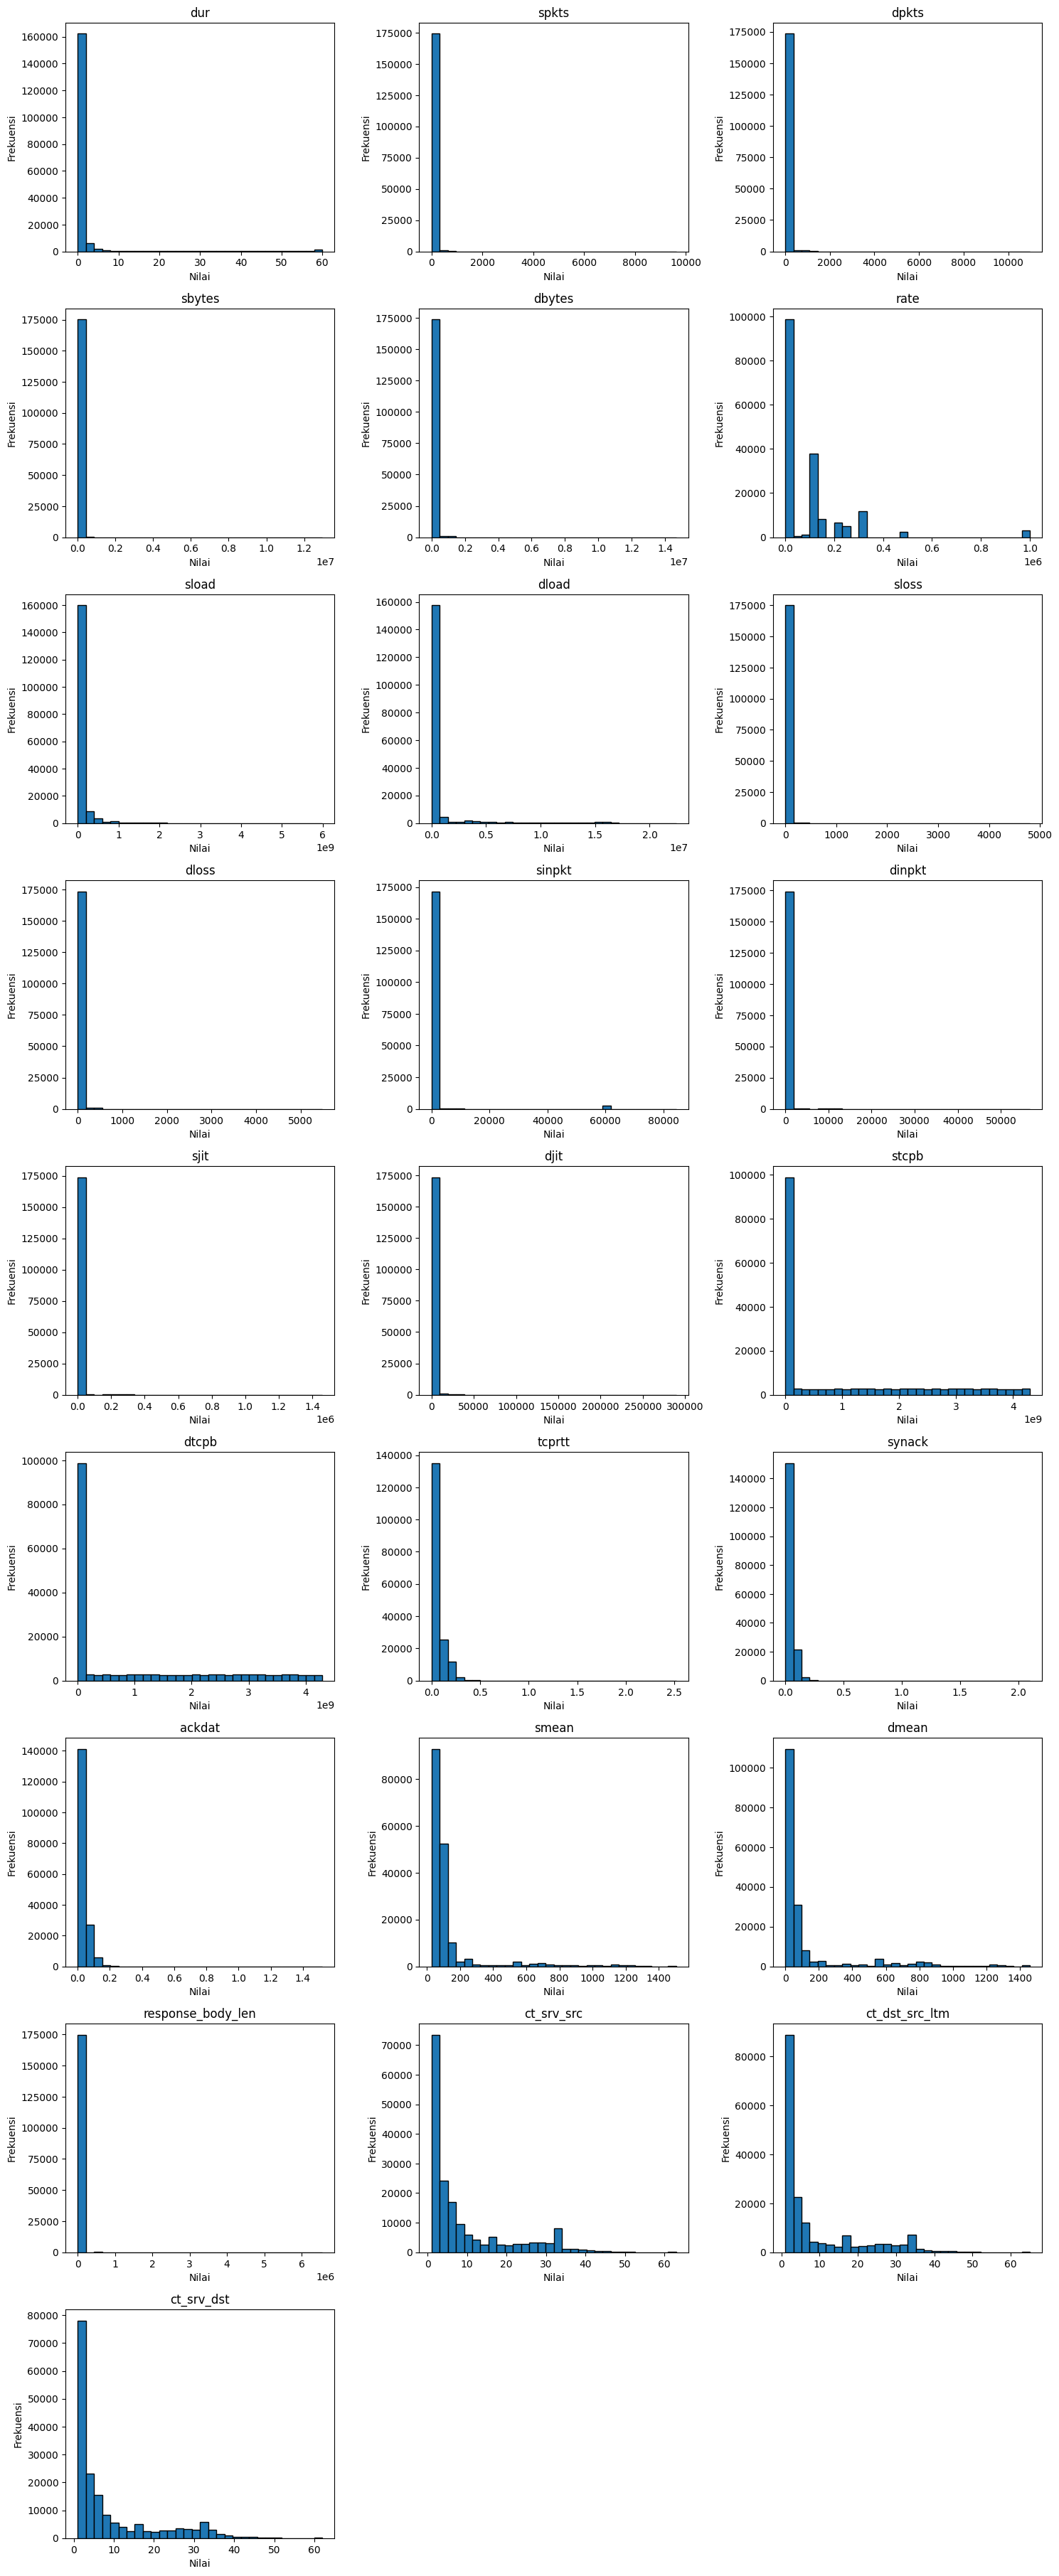

In [ ]:
# plot data using histogram per column
num_cols = len(trainset_num.columns)

cols = 3
rows = math.ceil(num_cols / cols)

plt.figure(figsize=(15, 4*rows))

index = 1

for col in trainset_num.columns:
  if trainset_num[col].nunique() > 50:
    plt.subplot(rows, cols, index)
    plt.hist(trainset_num[col], bins=30, edgecolor='black')
    plt.title(col)
    plt.xlabel('Nilai')
    plt.ylabel('Frekuensi')
    index += 1

plt.tight_layout()
plt.show()

In [ ]:
# check skewed of data
for col in trainset_num.columns:
  if col == 'label' or trainset_num[col].nunique() < 50:
    continue

  print(col)
  print(f'skew = {str(trainset_num[col].skew())}', end='\n\n')

dur
skew = 7.496060544592534

spkts
skew = 40.21770262781216

dpkts
skew = 36.764114389629526

sbytes
skew = 45.30344290011047

dbytes
skew = 39.760863679082696

rate
skew = 3.3194945898084494

sload
skew = 8.703398789576552

dload
skew = 4.691217092888466

sloss
skew = 44.75366181407537

dloss
skew = 41.38027007028287

sinpkt
skew = 7.917534921628944

dinpkt
skew = 29.67951203686419

sjit
skew = 17.65215718817733

djit
skew = 29.543830440063015

stcpb
skew = 1.081121495532782

dtcpb
skew = 1.0810171187072481

tcprtt
skew = 4.038358803391814

synack
skew = 5.786285648066837

ackdat
skew = 5.615605400717597

smean
skew = 3.72662255685938

dmean
skew = 2.8261458622156623

response_body_len
skew = 76.34007534990576

ct_srv_src
skew = 1.5211779927404614

ct_dst_ltm
skew = 2.050110491424287

ct_dst_src_ltm
skew = 1.5553647257828662

ct_src_ltm
skew = 1.8420849123086904

ct_srv_dst
skew = 1.529024540617822



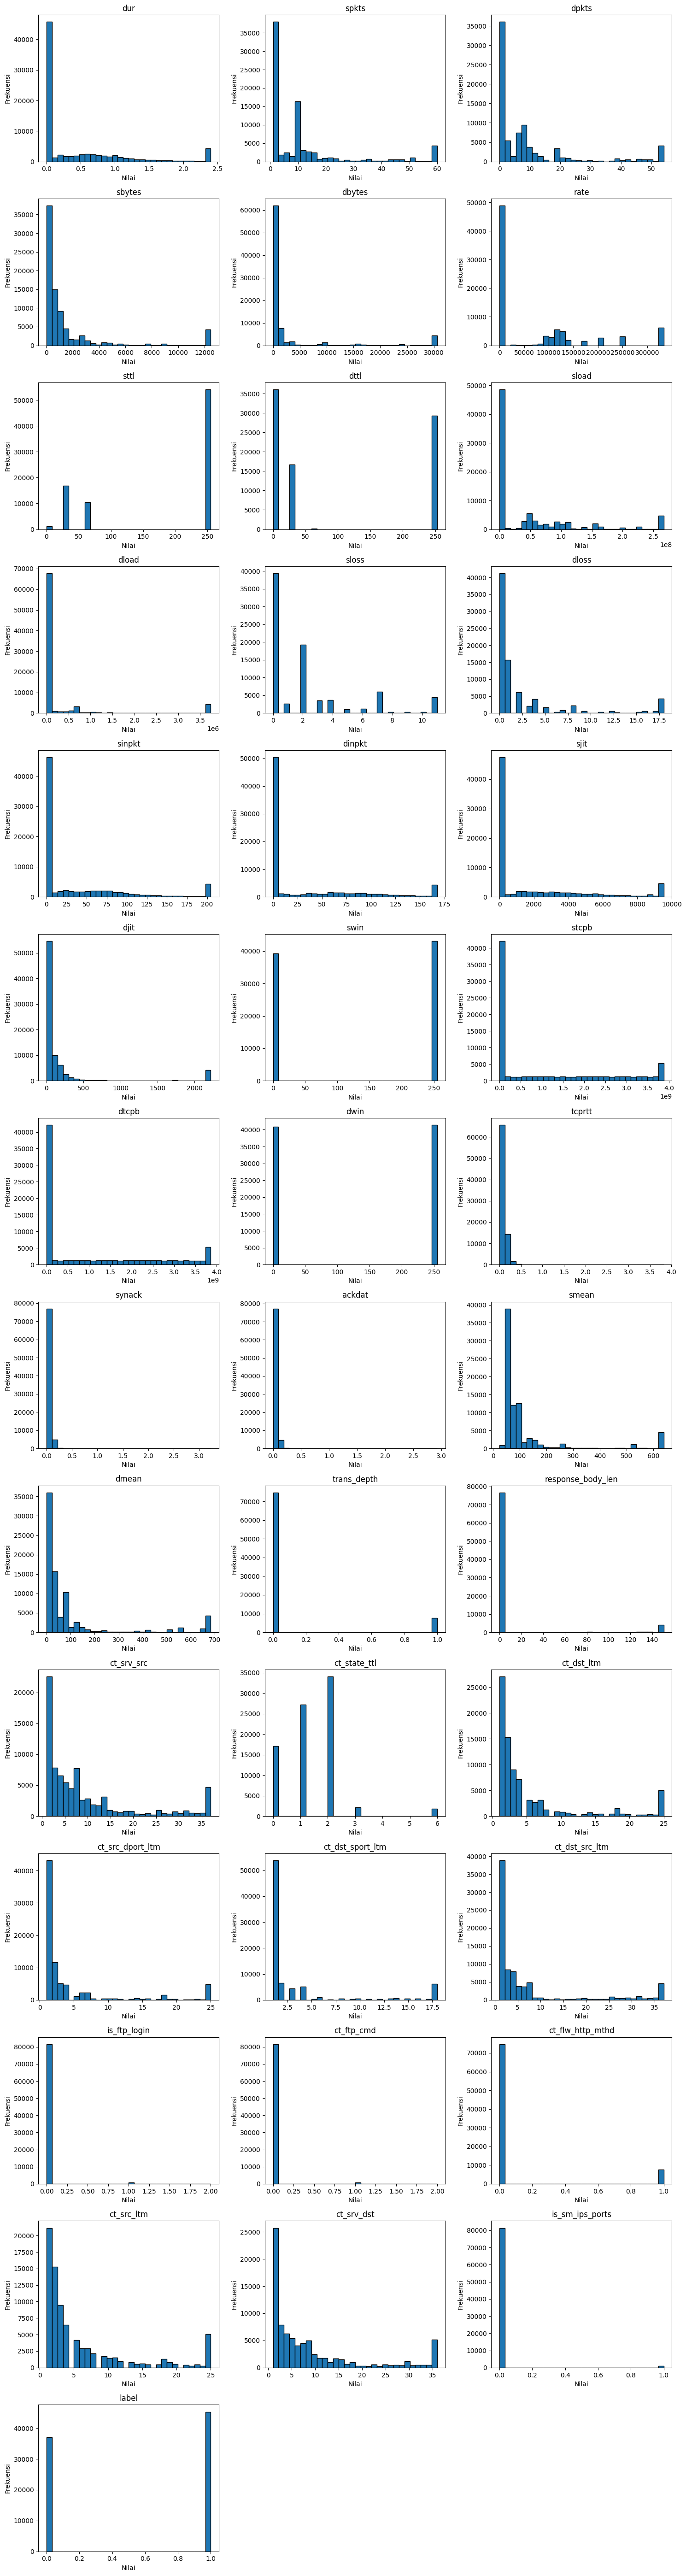

In [ ]:
# plot data using histogram per column
num_cols = len(testset_num.columns)

cols = 3
rows = math.ceil(num_cols / cols)

plt.figure(figsize=(15, 4*rows))

for i, col in enumerate(testset_num.columns, 1):
  plt.subplot(rows, cols, i)
  plt.hist(testset[col], bins=30, edgecolor='black')
  plt.title(col)
  plt.xlabel('Nilai')
  plt.ylabel('Frekuensi')

plt.tight_layout()
plt.show()

In [ ]:
trainset_num_before = trainset_num.copy()

# check skewed of data
# for col in trainset_num.columns:
#   if col == 'label' or trainset_num[col].nunique() < 50:
#     continue

#   print(col)
#   print(f'skew = {str(trainset_num[col].skew())}', end='\n\n')

for col in trainset_num.columns:
  if col == 'label' or trainset_num[col].nunique() < 50:
    continue

  print(col)
  print(f'nunique = {str(trainset_num[col].nunique())}')
  print(trainset_num[col].nunique() > 50)
  print(f'skew = {str(trainset_num[col].skew())}')
  print('-' * 50)

  if trainset_num[col].nunique() > 50:
    # transformasi data dengan



trainset_num = trainset.select_dtypes(include=[np.number])

IndentationError: expected an indented block after 'if' statement on line 21 (<ipython-input-16-b4289edfe594>, line 26)

In [ ]:
testset_num_before = testset_num.copy()

for col in testset_num.columns:
  if col == 'label':
    continue

  print(col)
  print(f'nunique = {str(testset_num[col].nunique())}')
  print(testset_num[col].nunique() > 50)
  print('-' * 50)

  if testset_num[col].nunique() > 50 and col != 'label':
    testset[col] = np.log1p(testset[col])

testset_num = testset.select_dtypes(include=[np.number])

In [ ]:
trainset_cat = trainset.select_dtypes(exclude=[np.number])
trainset_cat.describe(include='all')

,proto,service,state
count,175341,175341,175341
unique,133,13,9
top,tcp,-,INT
freq,79946,94168,82275


In [ ]:
testset_cat = testset.select_dtypes(exclude=[np.number])
testset_cat.describe(include='all')

,proto,service,state
count,82332,82332,82332
unique,131,13,7
top,tcp,-,FIN
freq,43095,47153,39339


In [ ]:
encoder = OneHotEncoder(sparse_output=False)
proto_encoded_train = encoder.fit_transform(trainset[['proto']])
proto_encoded_test = encoder.transform(testset[['proto']])

pca = PCA(n_components=10)
proto_pca_train = pca.fit_transform(proto_encoded_train)
proto_pca_test = pca.transform(proto_encoded_test)

In [ ]:
proto_pca_train_df = pd.DataFrame(proto_pca_train, columns=[f'proto_pca_{i+1}' for i in range(proto_pca_train.shape[1])])
trainset = pd.concat([trainset.reset_index(drop=True), proto_pca_train_df.reset_index(drop=True)], axis=1)

proto_pca_test_df = pd.DataFrame(proto_pca_test, columns=[f'proto_pca_{i+1}' for i in range(proto_pca_test.shape[1])])
testset = pd.concat([testset.reset_index(drop=True), proto_pca_test_df.reset_index(drop=True)], axis=1)

In [ ]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_train = encoder.fit_transform(trainset[['service', 'state']])
encoded_test = encoder.transform(testset[['service', 'state']])

columns_names = encoder.get_feature_names_out(['service', 'state'])

encoded_train_df = pd.DataFrame(encoded_train, columns=columns_names)
trainset = pd.concat([trainset.reset_index(drop=True), encoded_train_df.reset_index(drop=True)], axis=1)

encoded_test_df = pd.DataFrame(encoded_test, columns=columns_names)
testset = pd.concat([testset.reset_index(drop=True), encoded_test_df.reset_index(drop=True)], axis=1)

In [ ]:
trainset.drop(['proto', 'service', 'state'], axis=1, inplace=True)
testset.drop(['proto', 'service', 'state'], axis=1, inplace=True)

In [ ]:
# memindahkan kolom "label" ke kolom terakhir
label_col = trainset.pop('label')
trainset['label'] = label_col

label_col = testset.pop('label')
testset['label'] = label_col

In [ ]:
# normalize "trainset" using minmaxscaler
scaler = MinMaxScaler()
norm_trainset = scaler.fit_transform(trainset.iloc[:, :-1])
norm_trainset = pd.DataFrame(norm_trainset, columns=trainset.columns[:-1])
norm_trainset['label'] = trainset['label']

norm_testset = scaler.transform(testset.iloc[:, :-1])
norm_testset = pd.DataFrame(norm_testset, columns=testset.columns[:-1])
norm_testset['label'] = testset['label']

<ipython-input-37-429c11937767>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')


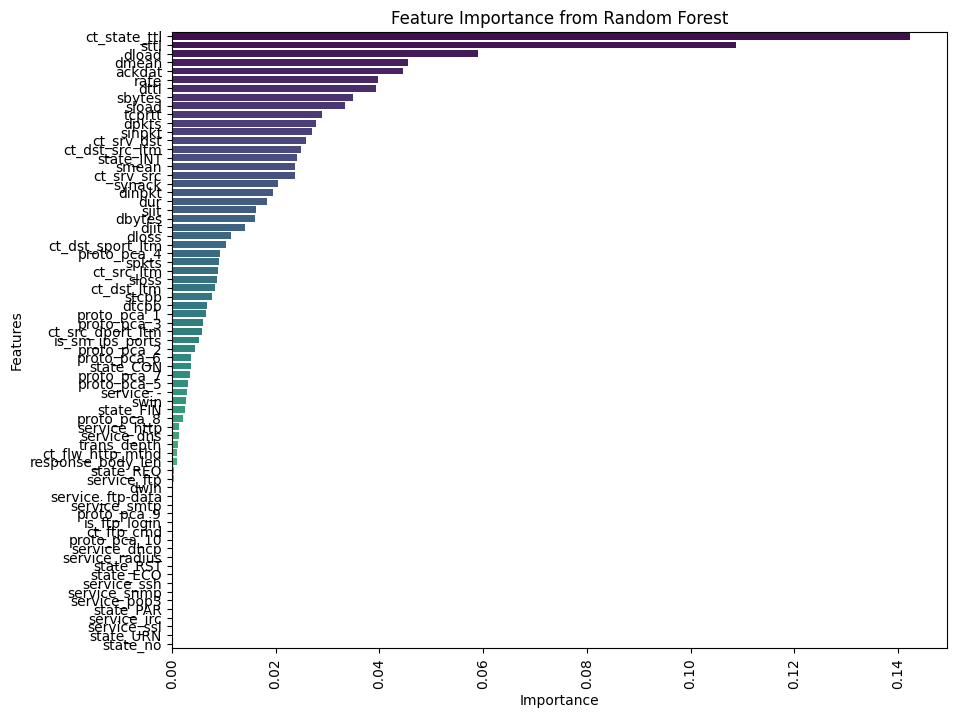

In [ ]:
# feature selection using random forest
from sklearn.ensemble import RandomForestClassifier

X = norm_trainset.iloc[:, :-1]
y = norm_trainset.iloc[:, -1]

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X, y)

feature_importances = rf_classifier.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df.sort_values(by='Importance', ascending=False, inplace=True)

plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance from Random Forest')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# select feature with threshold score 0.001
selected_features = feature_importance_df[feature_importance_df['Importance'] >= 0.001]['Feature']
selected_features.shape

(48,)

In [ ]:
# use selected feature for final dataset
final_trainset = norm_trainset[list(selected_features) + ['label']]
final_testset = norm_testset[list(selected_features) + ['label']]

In [ ]:
class TabularDataset(Dataset):
  def __init__(self, data, labels):
    self.data = torch.tensor(data.values, dtype=torch.float32)
    self.labels = torch.tensor(labels.values, dtype=torch.float32)

  def __len__(self):
    return len(self.data)

  def __getitem__(self, idx):
    return self.data[idx], self.labels[idx]

In [ ]:
class CNN(nn.Module):
    def __init__(self, num_features, num_classes=1):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv1d(in_channels=1, out_channels=16, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv1d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool1d(2)
        self.flatten = nn.Flatten()
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.5)

        self._calculate_flatten_size(num_features)

        self.fc1 = nn.Linear(self.flatten_size, 128)
        self.fc2 = nn.Linear(128, 1)

    def forward(self, x):
        # print(f"Input Shape: {x.shape}")  # Debugging input
        x = x.unsqueeze(1)  # Tambahkan channel dimension: (batch_size, 1, num_features)
        x = self.pool(self.relu(self.conv1(x)))  # Conv1
        # print(f"After Conv1 + Pool: {x.shape}")  # Debugging setelah conv1
        x = self.pool(self.relu(self.conv2(x)))  # Conv2
        # print(f"After Conv2 + Pool: {x.shape}")  # Debugging setelah conv2
        x = self.flatten(x)
        # print(f"After Flatten: {x.shape}")  # Debugging setelah flatten
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

    def _calculate_flatten_size(self, num_features):
        """Menghitung ukuran output flatten secara dinamis."""
        # Simulasikan tensor dummy
        x = torch.zeros(1, 1, num_features)  # (batch_size=1, channels=1, num_features)
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        x = self.flatten(x)
        self.flatten_size = x.shape[1]

In [ ]:
final_trainset['label'].value_counts()

,count
label,
1,119341
0,56000


In [ ]:
def train_model(model, train_loader, criterion, optimizer, num_epochs=10):
    model.train()
    for epoch in range(num_epochs):
        running_loss = 0.0
        for data, target in train_loader:
            optimizer.zero_grad()  # Clear gradients
            output = model(data)  # Forward pass
            loss = criterion(output, target.unsqueeze(1))  # Calculate loss
            loss.backward()  # Backward pass
            optimizer.step()  # Update weights
            running_loss += loss.item()
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}')

# Fungsi untuk mengevaluasi model
def evaluate_model(model, test_loader):
    model.eval()
    predictions = []
    targets = []

    with torch.no_grad():
        for data, target in test_loader:
            output = model(data)
            predicted = (torch.sigmoid(output) > 0.5).int()  # Thresholding
            predictions.extend(predicted.tolist())
            targets.extend(target.tolist())

    accuracy = accuracy_score(targets, predictions) * 100
    precision = precision_score(targets, predictions) * 100
    recall = recall_score(targets, predictions) * 100
    f1 = f1_score(targets, predictions) * 100

    conf_matrix = confusion_matrix(targets, predictions)

    print(f'Accuracy on validation set: {accuracy:.2f}%')
    print(f'Precision on validation set: {precision:.2f}%')
    print(f'Recall on validation set: {recall:.2f}%')
    print(f'F1 Score on validation set: {f1:.2f}%')

    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

In [ ]:
final_trainset['label'].value_counts()

,count
label,
1,119341
0,56000


In [ ]:
torch.manual_seed(42)

X = final_trainset.iloc[:, :-1]
y = final_trainset.iloc[:, -1]

dataset = TabularDataset(X, y)
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size

train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

In [ ]:
num_features = X.shape[1]
lr = 0.001
epochs = 100

num_class_0 = (y == 0).sum()
num_class_1 = (y == 1).sum()

model = CNN(num_features=num_features)
pos_weight = torch.tensor([num_class_0 / num_class_1])
criterion = nn.BCEWithLogitsLoss(pos_weight=pos_weight)
optimizer = optim.Adam(model.parameters(), lr=lr)

In [ ]:
train_model(model, train_loader, criterion, optimizer, num_epochs=20)

Epoch [1/20], Loss: 0.1100
Epoch [2/20], Loss: 0.0906
Epoch [3/20], Loss: 0.0865
Epoch [4/20], Loss: 0.0840
Epoch [5/20], Loss: 0.0828
Epoch [6/20], Loss: 0.0818
Epoch [7/20], Loss: 0.0809
Epoch [8/20], Loss: 0.0802
Epoch [9/20], Loss: 0.0796
Epoch [10/20], Loss: 0.0795
Epoch [11/20], Loss: 0.0790
Epoch [12/20], Loss: 0.0783
Epoch [13/20], Loss: 0.0780
Epoch [14/20], Loss: 0.0774
Epoch [15/20], Loss: 0.0772
Epoch [16/20], Loss: 0.0769
Epoch [17/20], Loss: 0.0767
Epoch [18/20], Loss: 0.0767
Epoch [19/20], Loss: 0.0763
Epoch [20/20], Loss: 0.0760


Accuracy on validation set: 93.82%
Precision on validation set: 97.99%
Recall on validation set: 92.77%
F1 Score on validation set: 95.31%


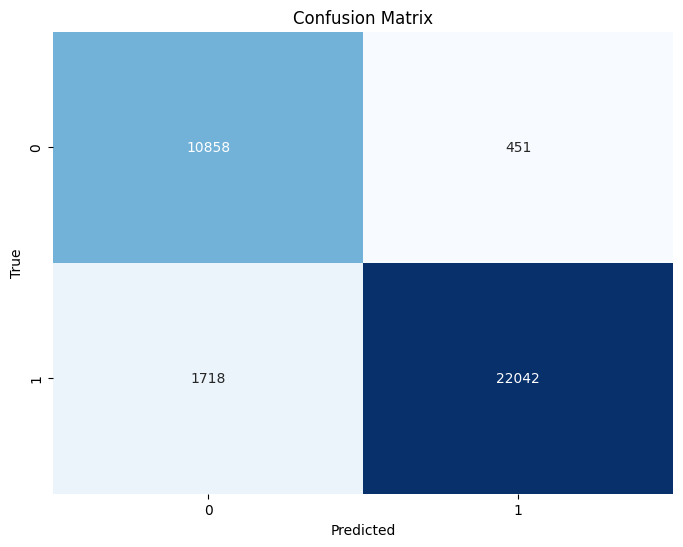

In [ ]:
evaluate_model(model, val_loader)

Accuracy on validation set: 90.81%
Precision on validation set: 89.68%
Recall on validation set: 94.14%
F1 Score on validation set: 91.85%


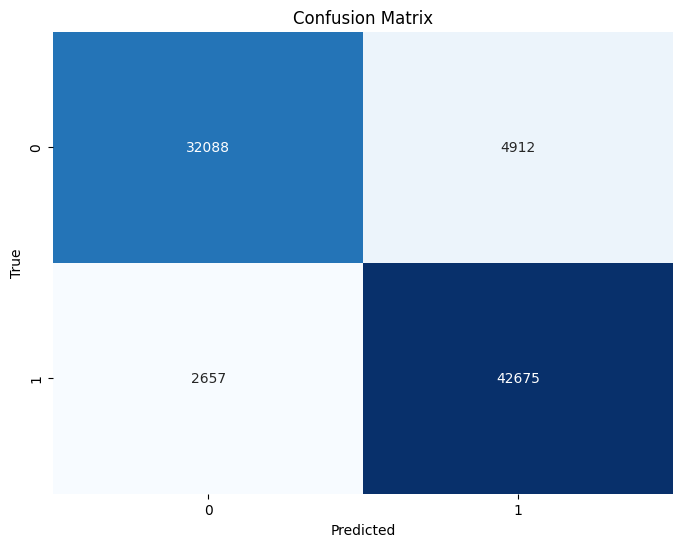

In [ ]:
# preparation data test
X_test = final_testset.iloc[:, :-1]
y_test = final_testset.iloc[:, -1]

test_dataset = TabularDataset(X_test, y_test)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

evaluate_model(model, test_loader)

In [ ]:
# simpan final_trainset dan finaltestset menjadi csv
final_trainset.to_csv('final_trainset.csv', index=False)
final_testset.to_csv('final_testset.csv', index=False)